In [4]:
import numpy as np
import matplotlib.pyplot as plt
import control

### Midterm Exam 2

(*You have* **90** *minutes to finish your work and upload your notebook!* **Identical solutions will be rejected with a zero score!**)

**Give your Neptun ID below!**

In [33]:
# Replace the string below with your Neptun ID!
neptun_ID = "CIVKUQ"  # <--- Neptun ID

**Q1.** Tuning a controller for a process given by its transfer function.

The transfer function of the process is:

$$ P(s) = \frac{k}{(1+T_1 s)(1+T_2 s)(1+T_3 s)} $$

with parameters: $k, T_1, T_2, T_3$.

In [34]:
# the parameters
# DO NOT MODIFY THIS PART!!!
rseed = int(neptun_ID, base=36)
np.random.seed(rseed)
k = np.random.uniform(0.7, 0.9)
T1 ,T2, T3 = np.random.uniform(0.8, 1.5, 3)
k, T1, T2, T3

(0.717985491155894, 1.4721838322399778, 1.4442466736997157, 0.9324796974333546)

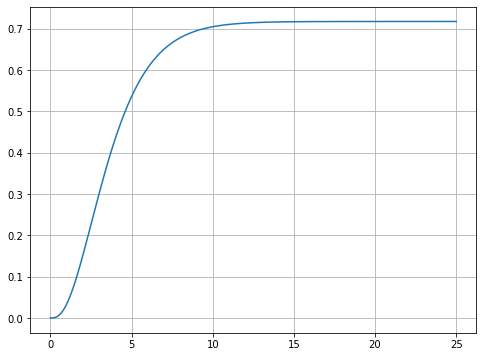

In [35]:
# process
num = [k]
den = [T1*T2*T3, (T1*T2+T1*T3+T2*T3), (T1+T2+T3), 1]
P = control.tf(num, den)

# plot
time = np.linspace(0, 25, 1000)
t, y = control.step_response(P, time)
plt.figure(figsize=(8,6))
plt.plot(t, y), plt.grid(True);

**Q1. (a.)** Approximate the process with a first order + time delay (FOPTD) process!

The transfer function of FOPDT process is:

$$ P(s) = \frac{k}{1+T_1 s}e^{-\tau s} $$

Give the parameters ($k,T_1, \tau$) of the FOPTD process!

In [118]:
# approximation
# The PT3 process can be approximated as it has an S-shaped response.
ix_1 = 250
ix_2 = 500
t1, t2 = t[ix_1], t[ix_2]
v1, v2 = y[ix_1], y[ix_2]

T1_d = (t2-t1)/np.log((k-v1)/(k-v2))
tau = T1_d*np.log((k-v1)/k) + t1
k, T1_d, tau

(0.717985491155894, -10.831138479069821, 31.6418664990002)

**Q1. (b.)** Given the control loop structure below:

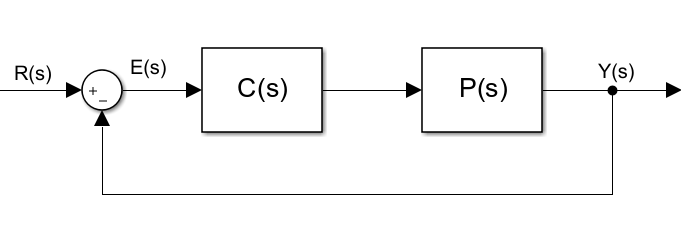

Tune a PI and a PID controller using the lambda-tuning method! Compare the behavior of the two solutions in time- and frequency domain!

$$ P(s) = \frac{k}{1+T_1 s}e^{-\tau s}$$
$$ G(s) = \frac{1}{1+\lambda s}e^{-\tau s}$$

This can only be achieved by means of PI or PID controller

$$ C(s) = Kp\left(1+\frac{1}{T_i s}\right) = \frac{K_p(1+T_i s)}{T_i s}$$

In [48]:
# PI
lambda_ = 15 # recommended: lambda_ > 0.2*tau
Kp = T1/(k*lambda_)
Ti = T1

num = [Kp*Ti, Kp]
den = [Ti, 0]
C = control.tf(num, den)

# tfs
G0 = control.series(C, P)
G = control.feedback(G0)

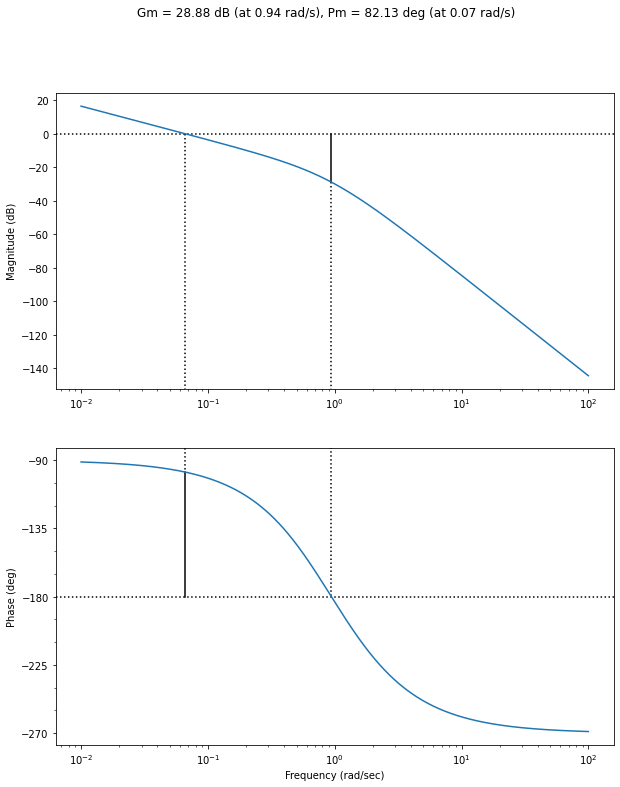

In [49]:
# frequency domain
plt.figure(figsize=(10, 12))
_ = control.bode_plot(G0, dB=True, margins=True)

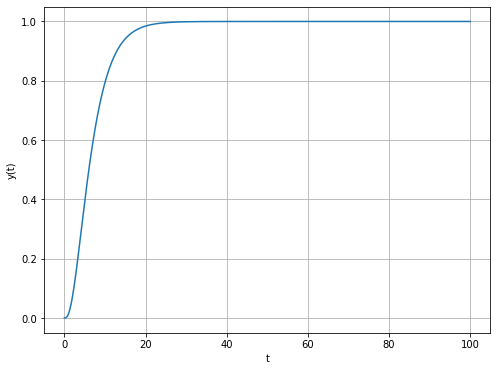

In [47]:
# time domain
time = np.linspace(0, 100, 1000)
t, y = control.step_response(G, time)
plt.figure(figsize=(8,6))
plt.plot(t, y), plt.grid(True), plt.xlabel('t'), plt.ylabel('y(t)');

$$ C(s) = Kp \left(1 + \frac{1}{T_i s} + T_D s \right) = \frac{K_p T_i s + K_p + K_p T_i T_D s^2}{T_i s} $$

In [56]:
# PID
lambda_ = 69 # recommended: lambda_ > 0.2*tau
Kp = (2*T1+tau)/k*2*(lambda_+tau)
Ti = T1+tau/2
Td = (lambda_*tau)/2*(lambda_+tau)

num = [Kp*Ti*Td, Kp*Ti, Kp]
den = [Ti, 0]
C = control.tf(num, den)

# tfs
G0 = control.series(C, P)
G = control.feedback(G0)

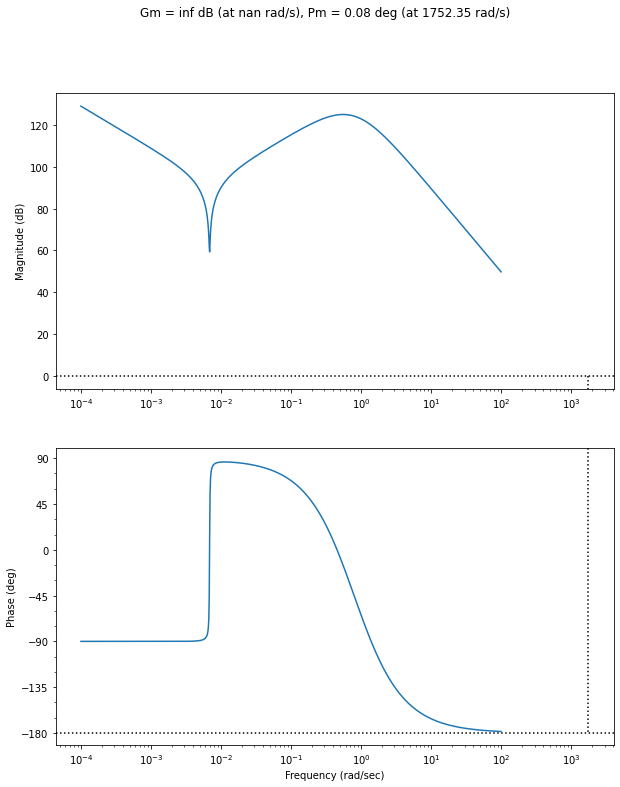

In [57]:
# frequency domain
plt.figure(figsize=(10, 12))
_ = control.bode_plot(G0, dB=True, margins=True)

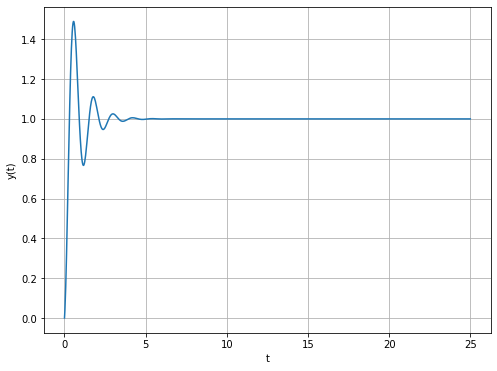

In [58]:
# time domain
time = np.linspace(0, 25, 1000)
t, y = control.step_response(G, time)
plt.figure(figsize=(8,6))
plt.plot(t, y), plt.grid(True), plt.xlabel('t'), plt.ylabel('y(t)');

In [15]:
# Notes on PI vs PID


**Q2.** Selecting and tuning a controller

We have the control loop structure below:

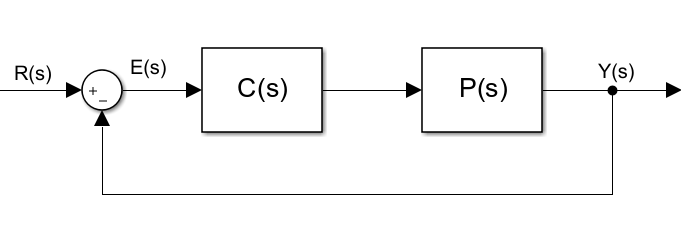

Given the following process:

$$ P(s) = \frac{k}{s(\tau s + 1)} $$

with parameters $k$ and $\tau$.

In [16]:
# the parameters
# DO NOT MODIFY THIS PART!!!
np.random.seed(rseed+1)
k = np.random.uniform(0.5, 2)
tau = np.random.uniform(0.01, 0.1)
k, tau

(1.7147794520935264, 0.014741798957034067)

In [17]:
# process
num = [k]
den = [tau, 1, 0]
P = control.tf(num, den)

**Q2. (a.)** Investigate the behavior of the process in frequency domain (Bode-, Nyquist-plot).

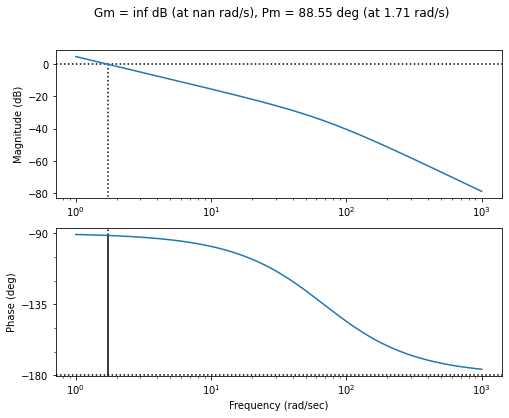

In [18]:
# Bode plot
plt.figure(figsize=(8, 6))
_ = control.bode_plot(P, dB=True, margins=True)

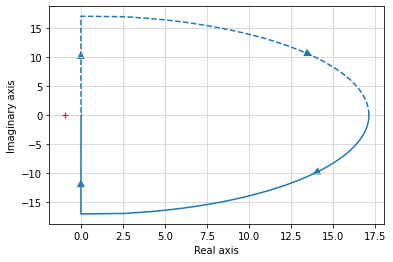

In [19]:
# Nyquist plot
omega = np.logspace(-4,4,1000)
control.nyquist_plot(P, omega=omega);

**Q2 (b.)** Assuming we have a P-controller, what is the steady-state output of the control system for unit step reference input?

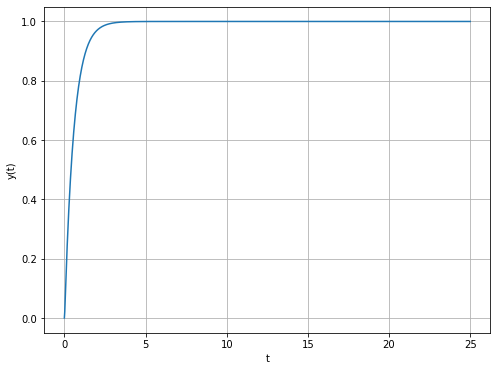

In [20]:
# controller
Kp = 1
C = control.tf([Kp], 1)
G0 = control.series(C, P)
G = control.feedback(G0)


time = np.linspace(0, 25, 1000)
t, y = control.step_response(G, time)
plt.figure(figsize=(8,6))
plt.plot(t, y), plt.grid(True), plt.xlabel('t'), plt.ylabel('y(t)');

# steady-state output is 1

**Q2. (c.)** Choose a controller for the control loop, the goal is reference tracking. Plot the step-response of the closed loop. **Requirements**: Zero steady-state error, settling time < 1 sec, max. overshot < 5%.

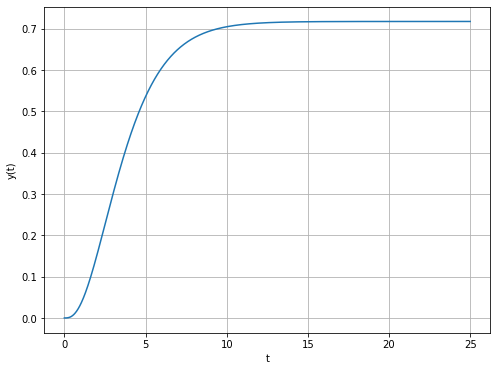

In [62]:
time = np.linspace(0, 25, 1000)
t, y = control.step_response(P, time)
plt.figure(figsize=(8,6))
plt.plot(t, y), plt.grid(True), plt.xlabel('t'), plt.ylabel('y(t)');

In [63]:
# approximation
# We can approximate the process by FOPTD as it is a S-shaped process
ix_1 = 250
ix_2 = 500
t1, t2 = t[ix_1], t[ix_2]
v1, v2 = y[ix_1], y[ix_2]

T1 = (t2-t1)/np.log((k-v1)/(k-v2))
tau = T1*np.log((k-v1)/k) + t1
k, T1, tau

# I use Cohen-Coon open-loop tuning method here.
# I will try to achieve the "quickest response(<1sec) without overshoot(<5%)".
# There is no doubt that that we will have a non-zero steady-state error
# as we have an integrating effect in the process.

(0.717985491155894, 1.7775531266063582, 2.7289918695594313)

In [109]:
# PID controller
Kp = (0.95*T1)/(k*tau)
Ti = 2.4*tau
TD = 0.42*tau

numC = [Kp*Ti*TD, Kp*Ti, Kp]
denC = [Ti, 0]

C = control.tf(numC, denC)

In [110]:
# PI controller
Kp = (0.6*T1)/(k*tau)
Ti = 4*tau

numC = [Kp*Ti, Kp]
denC = [Ti, 0]

C = control.tf(numC, denC)

In [111]:
# P controller
# Kp = (0.3*T1)/(k*tau)
Kp = 2

C = control.tf(Kp, 1)

In [112]:
# the open loop and the closed loop
G0 = control.series(C, P)
G = control.feedback(G0)
control.step_info(G)

{'RiseTime': 2.070221525859851,
 'SettlingTime': 10.589979343821545,
 'SettlingMin': 0.5393128408341404,
 'SettlingMax': 0.7080506774094145,
 'Overshoot': 20.113214363062923,
 'Undershoot': 0,
 'Peak': 0.7080506774094145,
 'PeakTime': 4.77743429044581,
 'SteadyStateValue': 0.5894860787500109}

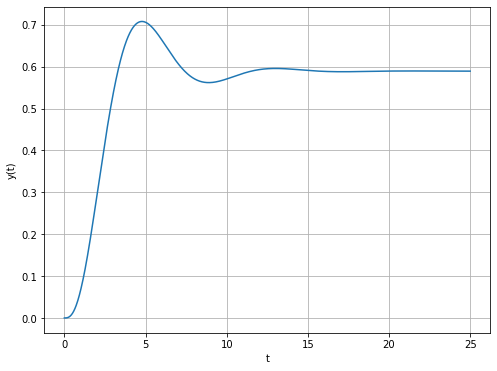

In [106]:
# plot
time = np.linspace(0, 25, 1000)
t, y = control.step_response(G, time)
plt.figure(figsize=(8,6))
plt.plot(t, y), plt.grid(True), plt.xlabel('t'), plt.ylabel('y(t)');

**Q2. (d.)** Investigate the stability properties of the control system (margins). Give a reasoning of your choice of controller and parameters. (Why did you choose that specific controller? How did you find the appropriate parameters for the controller?)

In [23]:
# stability
gm, pm, sm, gc, pc, sc = control.stability_margins(G0)
    # Investigating both visually(Nyquist plot) and numerically,
    # we can see that the system is stable
    
# controller choice
    
    # There are two criteria: 1) zero steady-state error 2) 5% overshoot.
    
    # It is true that the controller(P) I have chosen doesn't have an
    # integrating effect. However, we do have this effect in the process
    # and therefore have zero steady-state error.
    
    # As for the parameters that I have chosen, the value of Kp really is
    # tailored to achieve a settling time less than 1 sec
    
    